In [0]:
from fastai.vision import *

In [0]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
data = ImageDataBunch.from_folder(path)

In [0]:
data

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /root/.fastai/data/mnist_sample;

Test: None

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.165608,0.107893,0.968597,00:10


In [0]:
ds = data.train_ds

In [0]:
print(ds)

LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /root/.fastai/data/mnist_sample


In [0]:
img,label = ds[0]
img

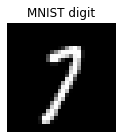

In [0]:
img.show(figsize=(2,2), title='MNIST digit')

In [0]:
img.rotate(37)

In [0]:
help(get_transforms)

Help on function get_transforms in module fastai.vision.transform:

get_transforms(do_flip:bool=True, flip_vert:bool=False, max_rotate:float=10.0, max_zoom:float=1.1, max_lighting:float=0.2, max_warp:float=0.2, p_affine:float=0.75, p_lighting:float=0.75, xtra_tfms:Union[Collection[fastai.vision.image.Transform], NoneType]=None) -> Collection[fastai.vision.image.Transform]
    Utility func to easily create a list of flip, rotate, `zoom`, warp, lighting transforms.



In [0]:
tfms = [rotate(degrees=(-20,20)), symmetric_warp(magnitude=(-0.3,0.3))]

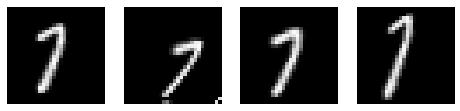

In [0]:
fig,axes = plt.subplots(1,4,figsize=(8,2))
for ax in axes: ds[0][0].apply_tfms(tfms).show(ax=ax)

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=(tfms, []))

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

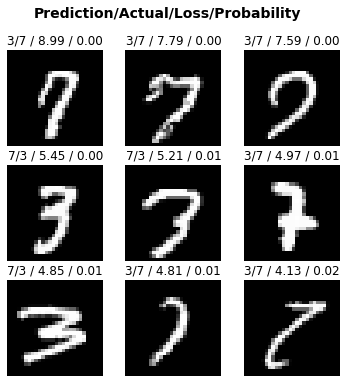

In [0]:
interp.plot_top_losses(9, figsize=(6,6))

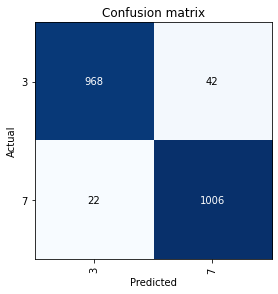

In [0]:
interp.plot_confusion_matrix()

In [0]:
img = learn.data.train_ds[0][0]
learn.predict(img)

(Category tensor(1), tensor(1), tensor([0.0033, 0.9967]))